# Data Science na Prática - LESC

Aqui nós vamos explorar um pouco sobre como é feita uma análise de dados, usando algoritmos de Machine Learning, na prática. O arquivo contém os códigos em linguagem Python, porém conhecimentos de programação não são necessários para entender os métodos aqui utilizados.

Convém saber um pouco de estatística e usar um pouco de bom senso.

## Introdução

A ciência de dados é a área de estudo que visa extrair informações relevantes sobre grandes quantidades de dados. Usualmente seguimos alguns passos para a análise:

1. Obtenção dos dados
2. Pré-processamento dos dados
3. Análise dos dados
4. Criação do modelo e treinamento
5. Análise dos resultados

### Qual nosso objetivo?

Antes de iniciar qualquer tipo de projeto da Data Science, nós devemos ter um objetivo em mente. Ele pode ser qualquer coisa: descobrir quem está fraudando cartões de crédito, classificar se existe um cachorro em uma imagem ou não, descobrir se sua namorada está te traindo ou identificar pessoas de interesse por meio de imagens de câmeras de segurança.

No nosso caso, vamos tentar prever se um determinado conjunto de pessoas sobreviveu ou não ao desastre do Titanic ocorrido em 1912!

In [1]:
# Aqui estamos importando algumas bibliotecas do Python para fazer nossas análises.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## 1. Obtenção dos dados

Essa etapa pode ser feita de diferentes maneiras, tudo depende de quais são seus dados, onde eles estão e o formato onde eles estão. 

No nosso caso, nossos dados são uma planilha que está na mesma pasta que esse arquivo, portanto, obtê-los será muito fácil.

In [2]:
train = pd.read_csv("Dados/train.csv")

Vamos dar uma olhada em como estão os nossos dados:

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Como você pode ver, ele é uma tabela. Cada linha da tabela diz respeito a um passageiro que estava a bordo do Titanic. Cada coluna é um atributo diferente desse passageiro.

Precisamos, antes de tudo, entender o que quer dizer cada um dos atributos temos a nossa disposição. Nesse caso, brevemente:

PassengerId - É o número da linha onde está o passageiro na tabela, não é muito importante.
Survived - Indica se ele sobreviveu ou não ao acidente. 1 Significa que sobreviveu, 0 que ele morreu.
Pclass - Indica a classe da cabine do passageiro, indo desde a 1ª classe (mais ricos) até a 3ª (mais pobres).
Name - O nome do cidadão.
Sex - O sexo do passageiro.
Age - A idade do passageiro.
SibSp - Quantidade de filhos(as)/esposo(a) a bordo junto com ele.
Parch - Quantidade de tios, pais e irmãos a bordo junto com ele.
Ticket - O ticket que ele usou pra embarcar.
Fare - O preço que ele pagou na passagem.
Cabin - Qual a cabine onde ele estava.
Embarked - Porto no qual ele embarcou, temos 3 opções.

## 2. Preprocessamento dos Dados

Agora que nós já temos acesso aos nossos dados e sabemos o que cada coisa significa, nós precisamos tratar um pouco esses dados. Isso acontece porque muitas vezes, no mundo real, os dados estão incompletos, com parâmetros faltando, ou então com valores absurdos (por exemplo uma idade de -5 anos). Nossos algoritmos de Machine Learning são muito sensíveis e por isso precisamos que os dados estejam o mais certinhos possíveis antes de usá-los.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Nós temos 891 passageiros na planilha. Como podemos ver, só temos a idade de 714 passageiros e a cabine de só 204. Além disso não temos o local de embarque para dois deles.

Não existe uma fórmula para fazer o preprocessamento. Existem diferentes meios e muitas vezes a opção que escolhemos altera de modo significativo o nosso resultado final. Como isso é uma aula introdutória, seguirei o preprocessamento mais simples possível, mas vou dizer como isso deveria ser feito na prática.

### Cuidando da cabine

Aqui, faremos exatamente o que seria feito na prática: vamos desconsiderar a cabine na nossa análise. Por que? Veja, nós não temos informações geográficas de cada cabine, então, usando o bom senso, conseguimos perceber que saber o número da cabine do cidadão não vai ajudar nosso algoritmo a acertar mais.

Portanto, jogaremos todo esse atributo fora.

In [5]:
train.drop("Cabin", axis=1, inplace=True)

### Cuidando da idade

O jeito mais fácil aqui, e o que faremos, é excluir todos os passageiros que tem idade faltando. 

A maneira mais correta, por outro lado, seria usar os nomes de cada um deles. Veja bem, nos nomes nós temos os títulos de cada pessoa (Mrs, Ms, Lady, etc). A partir disso, nós podemos agrupar todos de cada título, achar a idade média entre eles e atribuir essa idade média a cada um dos faltantes. Mas isso dá muito trabalho de ser feito, então vamos só excluir as linhas.

In [6]:
train.dropna(axis=0, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


Agora, como podemos ver, nós temos só 712 passageiros, porém, todos eles estão com informações completas.

## 3. Análise dos dados

Já cuidamos dos dados que faltam, agora vamos analisar um pouco os dados que nós temos para ver um pouco como eles estão relacionados com a sobrevivência dos nossos passageiros.

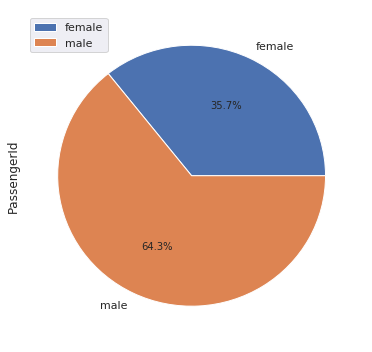

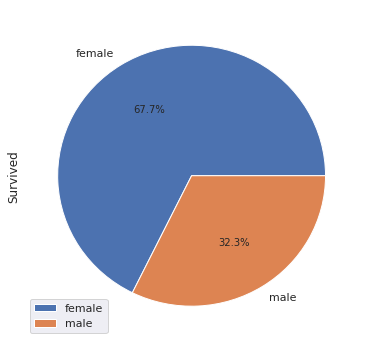

In [7]:
train.groupby(train.Sex).sum().plot.pie(['PassengerId'], figsize = (6,6), autopct='%1.1f%%')
train.groupby(train.Sex).sum().plot.pie(['Survived'], figsize = (6,6), autopct='%1.1f%%')

Como podemos ver pelo gráfico acima, mulheres, apesar de serem minoria no navio, foram as que mais sobreviveram. "Mulheres e crianças na frente", provavelmente. Então, sabemos que o sexo é um fator importante para determinar se alguém sobreviveu ou não.

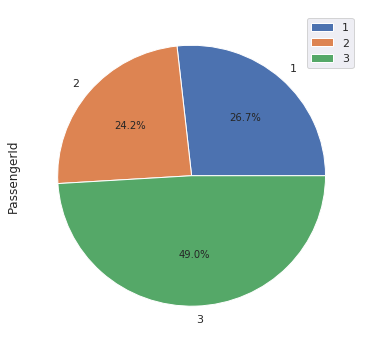

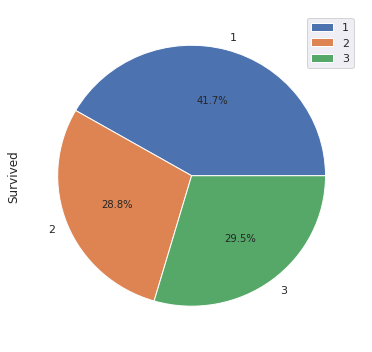

In [8]:
train.groupby(train.Pclass).sum().plot.pie('PassengerId', figsize=(6,6),autopct='%1.1f%%')
train.groupby(train.Pclass).sum().plot.pie('Survived', figsize=(6,6),autopct='%1.1f%%')

Vemos aqui que a maior parte do navio pertencia a terceira classe. Entretanto, a maior parte dos sobreviventes era da primeira classe. Bom, isso significa que a classe do cidadão também é um fator determinante.

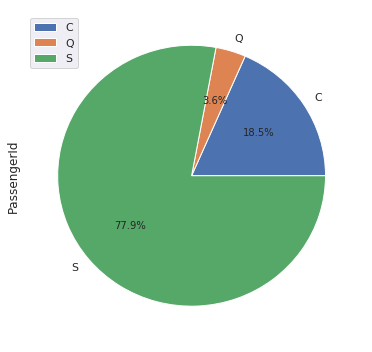

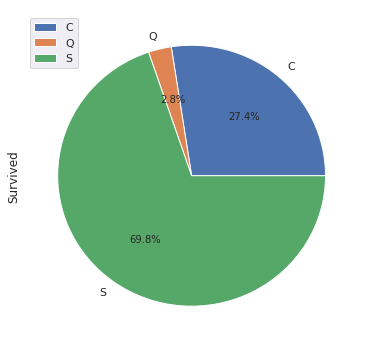

In [9]:
train.groupby(train.Embarked).sum().plot.pie('PassengerId', figsize=(6,6),autopct='%1.1f%%')
train.groupby(train.Embarked).sum().plot.pie('Survived', figsize=(6,6),autopct='%1.1f%%')

Por outro lado, vemos que a distribuição de quem morreu e quem sobreviveu baseado no local onde ele embarcou é quase igual. Por isso, consideramos esse atributo irrelevante para nossa análise e não vamos o considerar:

In [10]:
train.drop("Embarked", axis=1, inplace=True)

Aqui nós só analisamos algumas variáveis para manter a simplicidade, note que isso poderia ser muito melhorado se tivéssemos tempo para tal.

## 4. Criação do modelo

Agora vamos criar nosso modelo. O primeiro passo para isso é adaptar os nossos dados. Veja, no geral os algoritmos de Machine Learning só aceitam valores numéricos de entrada, então precisamos transformar nossos dados categóricos em dados numéricos.

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


O nome não é importante, nem o ticket, então vamos nos livrar deles. Já o sexo precisa ser transformado em um valor numérico. Faremos o mapeamento: Homem - 0, Mulher - 1.

In [12]:
train.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True)

map_sex = {'male': 0, 'female': 1}
train['Sex'] = train['Sex'].map(map_sex)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


### Dividindo nossos dados entre treinamento e teste

A ideia é que a gente treine o nosso modelo com os dados conhecidos, e assim ele consiga dizer para a gente se a pessoa sobreviveu ou não com uma entrada completamente nova. Então, vamos dividir os dados que nós temos em dois tipos: treinamento e teste.

Os dados de treinamento vão ser usados para treinar o modelo, e então vamos ver como o modelo se sai com os dados de teste.

In [13]:
from sklearn.model_selection import train_test_split

df = train.drop('Survived', axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

### Usando o K-Nearest-Neighbors

O KNN é o algoritmo mais básico de Machine Learning. Por motivos de simplicidade é ele que nós vamos utilizar aqui.

In [14]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = KNeighborsClassifier(n_neighbors = 4)
neighbors.fit(X_train,y_train)

y_predicted = neighbors.predict(X_test)
neighbors.score(X_test, y_test)

0.6573426573426573

## 5. Análise dos resultados

Como podemos ver, nosso algoritmo acertou 65% dos casos. Esse valor é muito baixo e não é comercialmente viável, porém, dadas as inúmeras simplificações que fizemos, já era esperado que o resultado fosse ruim.

As melhores análises feitas em cima desses dados tem porcentagens de acerto da ordem de 80%.

Entretanto, isso serve para mostrar o básico de um passo a passo de como uma análise é feita. Tenha em mente que análises reais e comerciais são muito mais complexas.